In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
rng = np.random.RandomState(35)
x= 10 * rng.rand(40)
y= 2 * x - 1 + rng.rand(40)

In [3]:
data = pd.DataFrame({'X':x,'Y':y})
print(data.head())

          X          Y
0  4.580549   8.804133
1  3.083496   5.467443
2  2.314870   3.875101
3  2.774246   5.094515
4  8.172348  15.464457


In [4]:
X = x[:, np.newaxis]

In [5]:
model = LinearRegression(fit_intercept=True)

In [6]:
model.fit(X,y)

LinearRegression()

In [7]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

In [8]:
import seaborn as sns

In [9]:
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis= 1)
y_iris = iris['species']

In [10]:
from sklearn .decomposition import PCA

model = PCA(n_components=2)

model.fit(X_iris)

PCA(n_components=2)

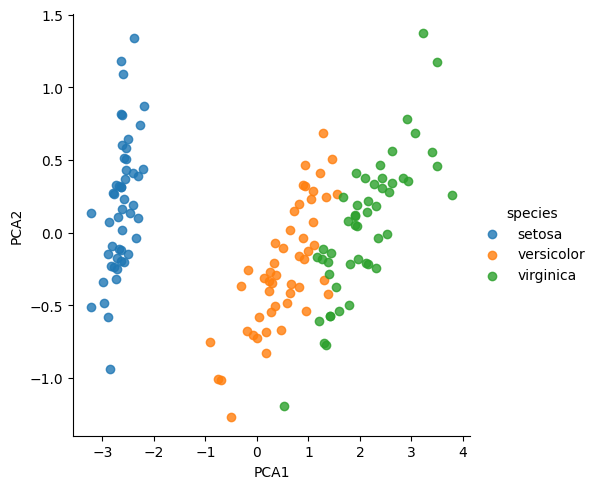

In [11]:
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x="PCA1", y= "PCA2", hue="species", data= iris, fit_reg=False)

In [12]:
df= pd.read_csv("datasets/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 5)

In [14]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
print(np.mean(df['TV']))

147.0425


In [18]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [19]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\Bikesh Khyaju\AppData\Local\Temp\ipykernel_25920\2873433845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.radio)


<Axes: xlabel='radio', ylabel='Density'>

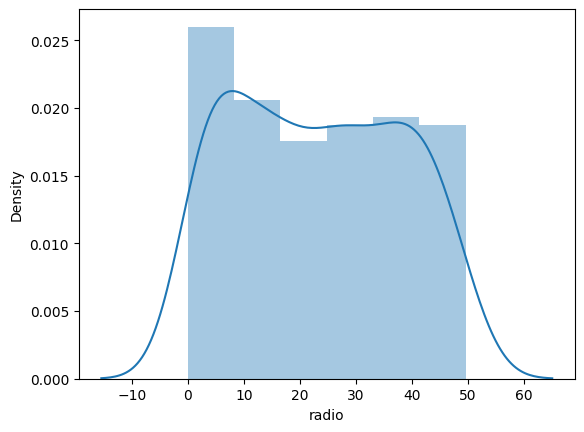

In [20]:
sns.distplot(df.radio)

<Axes: xlabel='radio', ylabel='Count'>

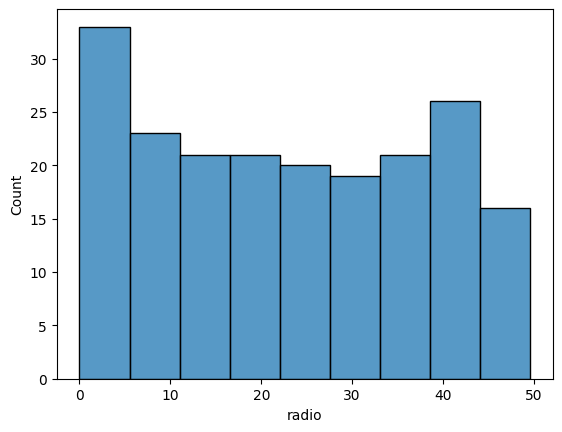

In [21]:
sns.histplot(df.radio)

C:\Users\Bikesh Khyaju\AppData\Local\Temp\ipykernel_25920\3464958114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

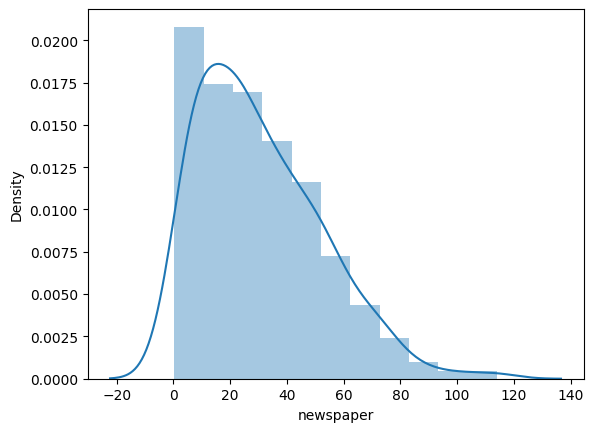

In [22]:
sns.distplot(df.newspaper)

In [24]:
df.TV.corr(df.sales)

np.float64(0.7822244248616066)

In [25]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

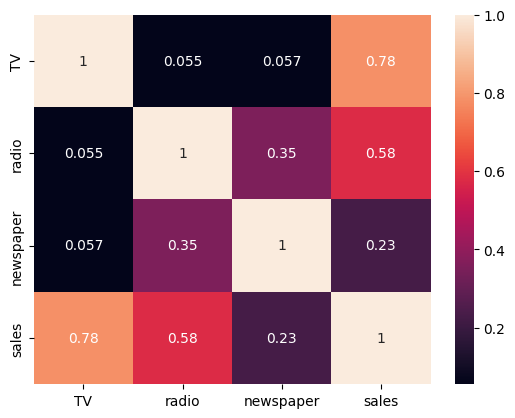

In [27]:
sns.heatmap(df.corr(), annot= True)

In [28]:
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#create
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

# instantiat and fit
lm1 = LinearRegression() # model lm1 refers to first model
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [29]:
list(zip(feature_cols, lm1.coef_))

[('TV', np.float64(0.0457646454553976)),
 ('radio', np.float64(0.18853001691820445)),
 ('newspaper', np.float64(-0.0010374930424763285))]

In [30]:
lm1_preds = lm1.predict(X[['TV', 'radio', 'newspaper']])

In [31]:
print('R^2: ', r2_score(y, lm1_preds))

R^2:  0.8972106381789522


In [32]:
#create
feature_cols = ['TV', 'radio',]
X = df[feature_cols]
y = df.sales

# instantiat and fit
lm1 = LinearRegression() # model lm1 refers to first model
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9210999124051362
[0.04575482 0.18799423]


In [33]:
lm1_preds = lm1.predict(X[['TV', 'radio']])

In [34]:
print('R^2: ', r2_score(y, lm1_preds))

R^2:  0.8971942610828957
